In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("network_intrusion_detection 1.csv")

In [3]:
x=df.drop(['class_types','class','target class','protocol_type_icmp'],axis=1)

In [4]:
y=df['target class']

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [13]:
model = LogisticRegression()
model.fit(x,y)

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
[variance_inflation_factor(x.values, j) for j in range(x.shape[1])]

C:\Users\Akash\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


[1.3187693259519275,
 62.507199325443395,
 4.339310540936049,
 1.0073389351224171,
 1.0015458466688276,
 1.0174211299249833,
 1.1658747188060425,
 1.028510056780068,
 3.9554745165627105,
 1.0331928877022567,
 18.479546229635307,
 894.763484404915,
 1.642094672228624,
 2.6276921365345465,
 921.783087327179,
 1.0461554424048358,
 1.0254114045021074,
 1.8926636262951075,
 nan,
 1.0005687827216982,
 4.000330880624545,
 7.296072486623818,
 4.666489788009301,
 147.7116422400287,
 174.3338688707053,
 71.79366159450966,
 76.13731550785957,
 31.690010220327665,
 2.154969897199968,
 1.5810763132919492,
 8.774655688920246,
 17.25561565534001,
 27.686317590015772,
 3.241437730454313,
 2.5844486035127314,
 1.917663682257729,
 61.072007018725635,
 87.71862626746015,
 10.980560027502602,
 23.23822677734611,
 51.89878378870222]

In [7]:
def calculate_vif(x):
    thresh = 4.5
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)
train_out = calculate_vif(x) 

Iteration no.
1
[1.3187693259519275, 62.507199325443395, 4.339310540936049, 1.0073389351224171, 1.0015458466688276, 1.0174211299249833, 1.1658747188060425, 1.028510056780068, 3.9554745165627105, 1.0331928877022567, 18.479546229635307, 894.763484404915, 1.642094672228624, 2.6276921365345465, 921.783087327179, 1.0461554424048358, 1.0254114045021074, 1.8926636262951075, nan, 1.0005687827216982, 4.000330880624545, 7.296072486623818, 4.666489788009301, 147.7116422400287, 174.3338688707053, 71.79366159450966, 76.13731550785957, 31.690010220327665, 2.154969897199968, 1.5810763132919492, 8.774655688920246, 17.25561565534001, 27.686317590015772, 3.241437730454313, 2.5844486035127314, 1.917663682257729, 61.072007018725635, 87.71862626746015, 10.980560027502602, 23.23822677734611, 51.89878378870222]
Max VIF is for variable no.:
18
Iteration no.
2
[1.3187693259519278, 62.507199325443395, 4.339310540936049, 1.0073389351224158, 1.001545846668827, 1.0174211299249831, 1.1658747188060425, 1.02851005678

Iteration no.
12
[1.2713007732675525, 2.314717679815893, 1.0067629890045051, 1.0013546375275448, 1.0076539489023202, 1.0974092179919037, 1.0221654958055666, 3.903827793625733, 1.0182029250841242, 5.0779842520095455, 1.1698880574885522, 1.6351392051685307, 2.1708593880734606, 1.033020695904428, 1.0243289774757396, 1.5220463273200275, 1.0002145415610129, 3.9513824006989107, 5.2189555916170605, 3.2650540898387574, 4.296452437912024, 1.7423605684247891, 1.4395789060186968, 6.36033472317726, 5.787817581475176, 2.3932248688052424, 1.8496924041883887, 1.5913436453385066, 8.92487750275961, 8.919623072696888]
Max VIF is for variable no.:
28
Iteration no.
13
[1.265856656282592, 2.3147101885027497, 1.005952625616858, 1.0013353653112749, 1.0076078110948836, 1.0795424772997846, 1.0221457764914506, 3.903749307603513, 1.0180404986817893, 5.060554172159927, 1.1698876043034836, 1.6351161110581451, 2.170753024850833, 1.033002504369901, 1.02427440563628, 1.5220087966533449, 1.0002009321187013, 3.95105453

In [16]:
train_out.head()

duration  protocol_type_udp  src_bytes  dst_bytes  land  wrong_fragment  \
0         0                  0        491          0     0               0   
1         0                  1        146          0     0               0   
2         0                  0          0          0     0               0   
3         0                  0        232       8153     0               0   
4         0                  0        199        420     0               0   

   urgent  hot  num_failed_logins  logged_in  ...  is_guest_login  count  \
0       0    0                  0          0  ...               0      2   
1       0    0                  0          0  ...               0     13   
2       0    0                  0          0  ...               0    123   
3       0    0                  0          1  ...               0      5   
4       0    0                  0          1  ...               0     30   

   srv_count  serror_rate  diff_srv_rate  srv_diff_host_rate  \
0          2          0.0           0.00                0.00   
1          1          0.0           0.15                0.00   
2          6          1.0           0.07                0.00   
3          5          0.2           0.00                0.00   
4         32          0.0           0.00                0.09   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2                    0.05                         0.00   
3                    0.00                         0.03   
4                    0.00                         0.00   

   dst_host_srv_diff_host_rate  dst_host_srv_rerror_rate  
0                         0.00                      0.00  
1                         0.00                      0.00  
2                         0.00                      0.00  
3                         0.04                      0.01  
4                         0.00                      0.00  

[5 rows x 27 columns]

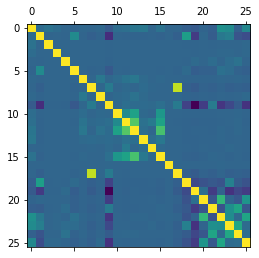

In [10]:
import matplotlib.pyplot as plt

plt.matshow(train_out.corr())
plt.show()

In [8]:
[variance_inflation_factor(train_out.values, j) for j in range(train_out.shape[1])]

[1.2309183227453044,
 1.430003802285871,
 1.0058563257443511,
 1.00132307207363,
 1.0063734683861738,
 1.0711280750211203,
 1.0220639575980175,
 3.9025763549239385,
 1.0175801390220687,
 1.16797031294717,
 1.1697669838080604,
 1.6344107416262965,
 2.1690034047465065,
 1.0303342075450255,
 1.022859977319042,
 1.5210014731482173,
 1.0001536550201062,
 3.907791260576717,
 1.3366578261711093,
 1.0970681612663633,
 1.5935461877347534,
 1.4286609070742518,
 2.1079712655239673,
 1.8335371540506114,
 1.521251078943626,
 1.4044509737055493]

In [12]:
train_out.to_csv(index=False)

'duration,protocol_type_udp,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,srv_count,serror_rate,diff_srv_rate,srv_diff_host_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_srv_rerror_rate\r\n0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.0,0.0,0.0,0.03,0.17,0.0,0.0\r\n0,1,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.15,0.0,0.6,0.88,0.0,0.0\r\n0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1.0,0.07,0.0,0.05,0.0,0.0,0.0\r\n0,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5,0.2,0.0,0.0,0.0,0.03,0.04,0.01\r\n0,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,32,0.0,0.0,0.09,0.0,0.0,0.0,0.0\r\n0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,0.0,0.06,0.0,0.07,0.0,0.0,1.0\r\n0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,1.0,0.06,0.0,0.05,0.0,0.0,0.0\r\n0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,1.0,0.06,0.0,0.07,0.0,0.0,0.0\r\n0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [14]:
export_csv = train_out.to_csv (r'C:\Users\Akash\Desktop\Python- Aug 24\Capstone\export_dataframe.csv', index = None)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


ModuleNotFoundError: No module named 'xgboost'

In [18]:
train_x, test_x, train_y, test_y = train_test_split(train_out, y, test_size = 0.3)

In [19]:
train_x.shape

(88181, 26)

In [20]:
test_x.shape

(37792, 26)

In [21]:
model = LogisticRegression()
model.fit(train_x, train_y)

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
score = model.score(test_x, test_y)

In [23]:
score

0.3766405588484335

In [24]:
pred_y = model.predict(test_x)
 

In [25]:
result = confusion_matrix(test_y, pred_y)
 
print(result) 



[[13282  6839]
 [16719   952]]


In [26]:
train_y.value_counts()

0    47222
1    40959
Name: target class, dtype: int64

In [27]:
test_y.value_counts()

0    20121
1    17671
Name: target class, dtype: int64